In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_dir = '/content/GOOGL.csv'
df = pd.read_csv(data_dir,  na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [ ]:
df.sample(25)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-28,1119.000000,1133.989990,1118.410034,1126.550049,1126.550049,1371100
2021-04-13,2250.989990,2263.469971,2243.050049,2254.429932,2254.429932,1284100
2019-01-24,1082.510010,1088.000000,1070.020020,1084.000000,1084.000000,1455700
2011-11-03,293.793793,299.049042,292.152161,299.049042,299.049042,5334260
2009-03-03,165.200195,167.012009,161.336334,162.902908,162.902908,13036550
2008-12-15,157.162155,159.404404,152.707703,155.490494,155.490494,13462324
2017-05-17,959.700012,960.989990,940.059998,942.169983,942.169983,2449100
2012-02-22,306.286285,308.698700,303.658661,304.274261,304.274261,3930066
2012-03-28,326.341339,329.624634,325.865875,328.208221,328.208221,5072722


In [ ]:
df.shape

(4431, 6)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.nunique()

Open         4314
High         4282
Low          4323
Close        4352
Adj Close    4352
Volume       4317
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.3 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


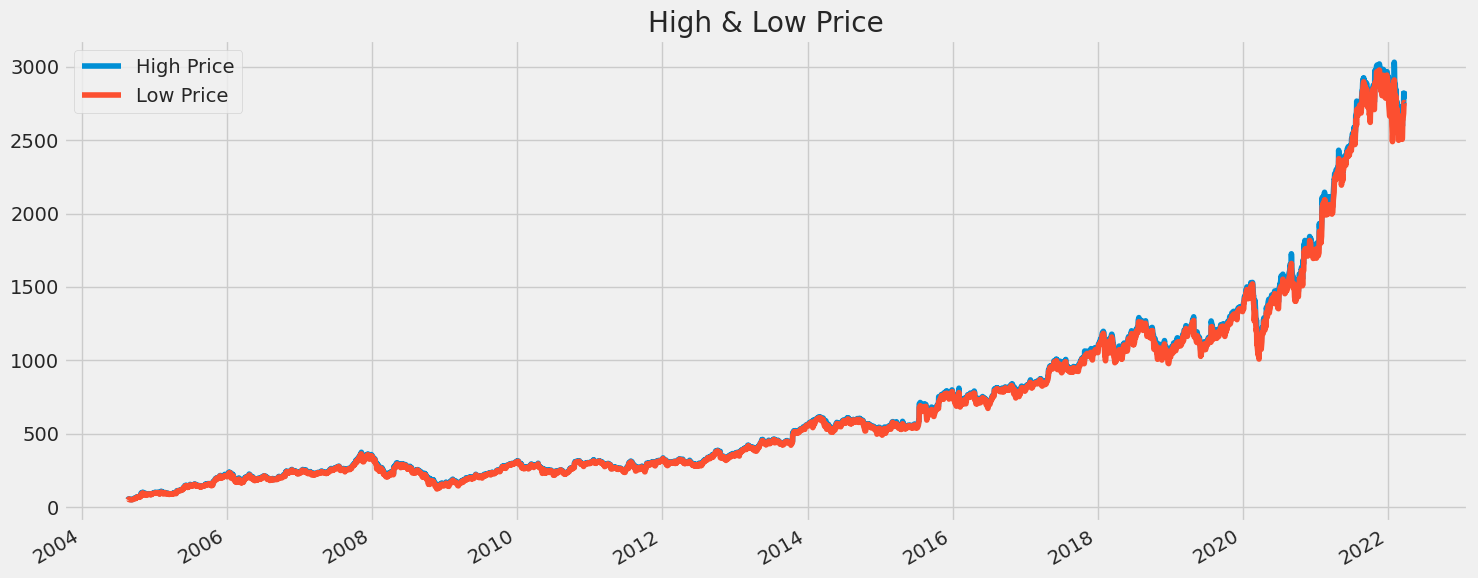

In [ ]:
plt.figure(figsize=(15, 6))
df['High'].plot()
df['Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Price")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

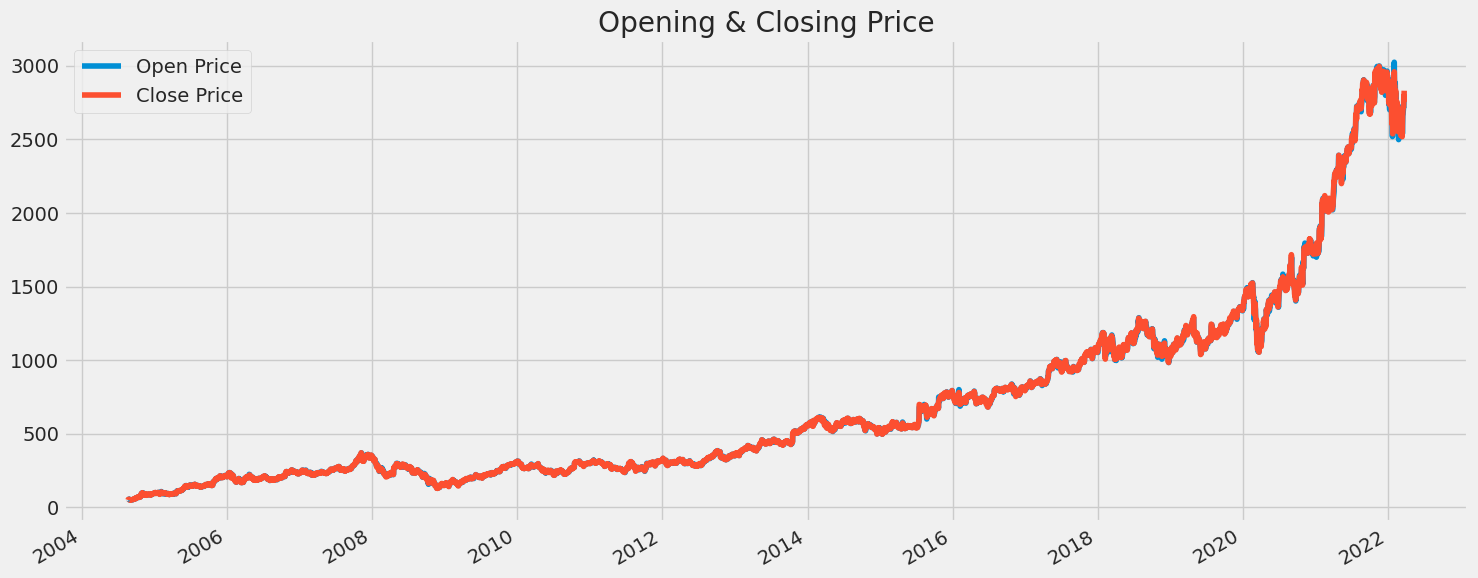

In [ ]:
plt.figure(figsize=(15, 6))
df['Open'].plot()
df['Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

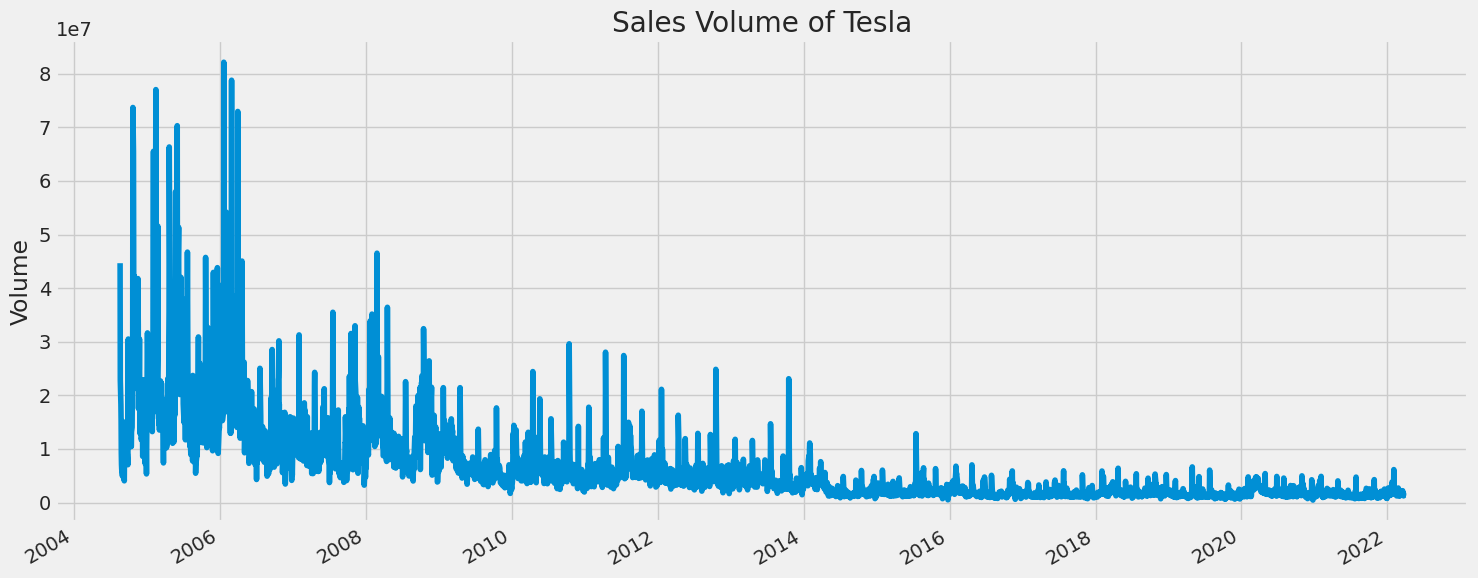

In [ ]:
plt.figure(figsize=(15, 6))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of Tesla")
plt.tight_layout()
plt.show()

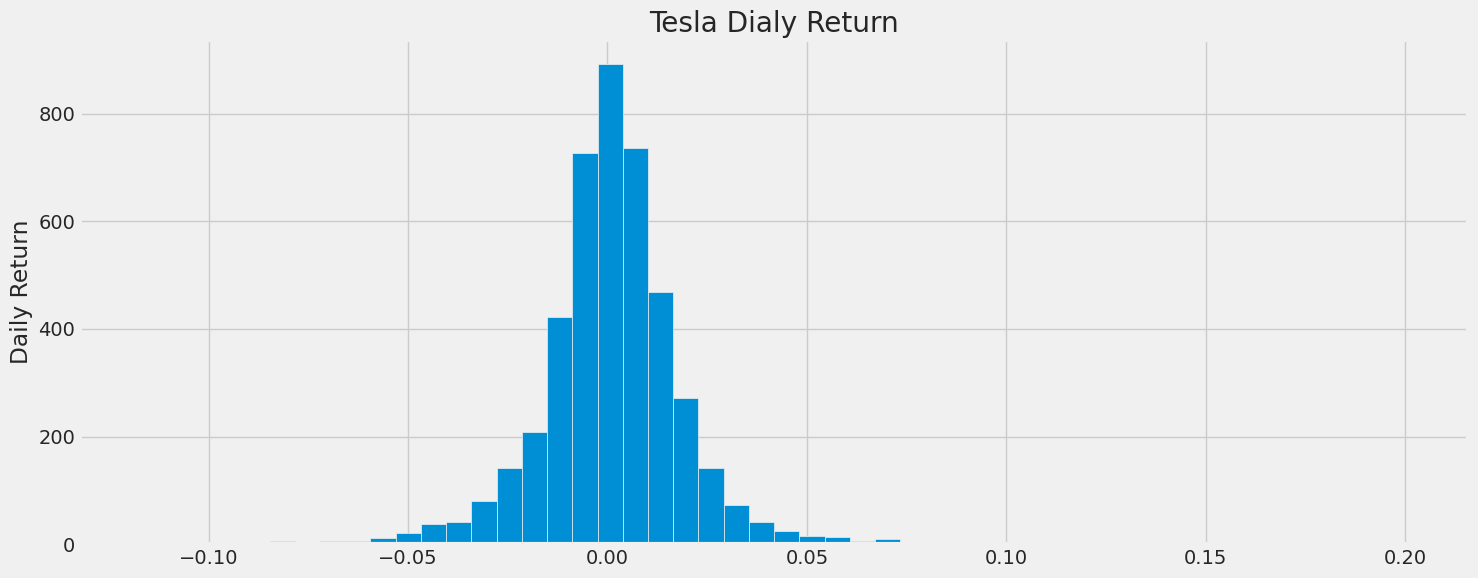

In [ ]:
plt.figure(figsize=(15, 6))
df['Adj Close'].pct_change().hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Tesla Dialy Return')
plt.tight_layout()
plt.show()

In [ ]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open', 'High', 'Low', 'Volume']

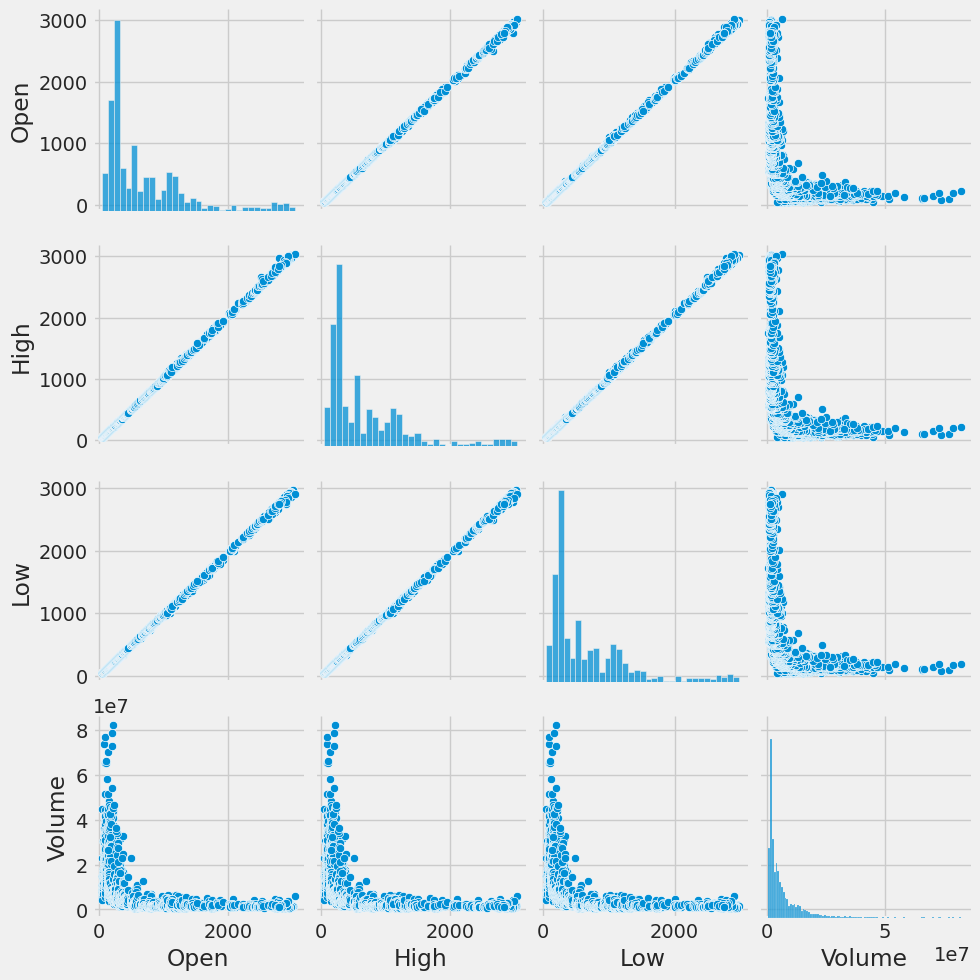

In [ ]:
sns.pairplot(df[features])
plt.show()

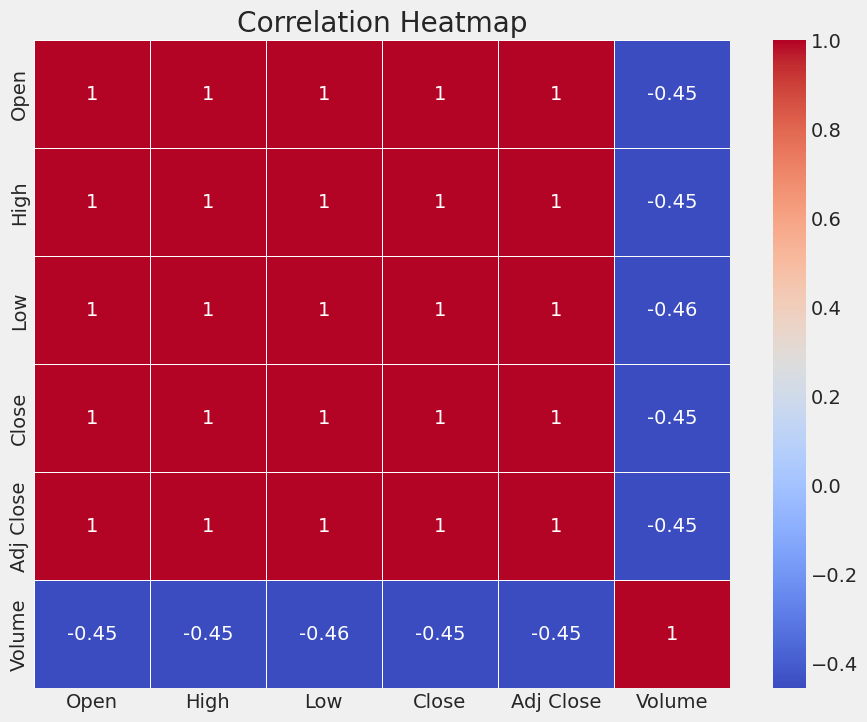

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
split_ratio = 0.8
split_index = int(split_ratio * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
split_ratio = 0.8
split_index = int(split_ratio * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 137.80451019067536


In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")

Training Score: 1.00
Testing Score: 1.00


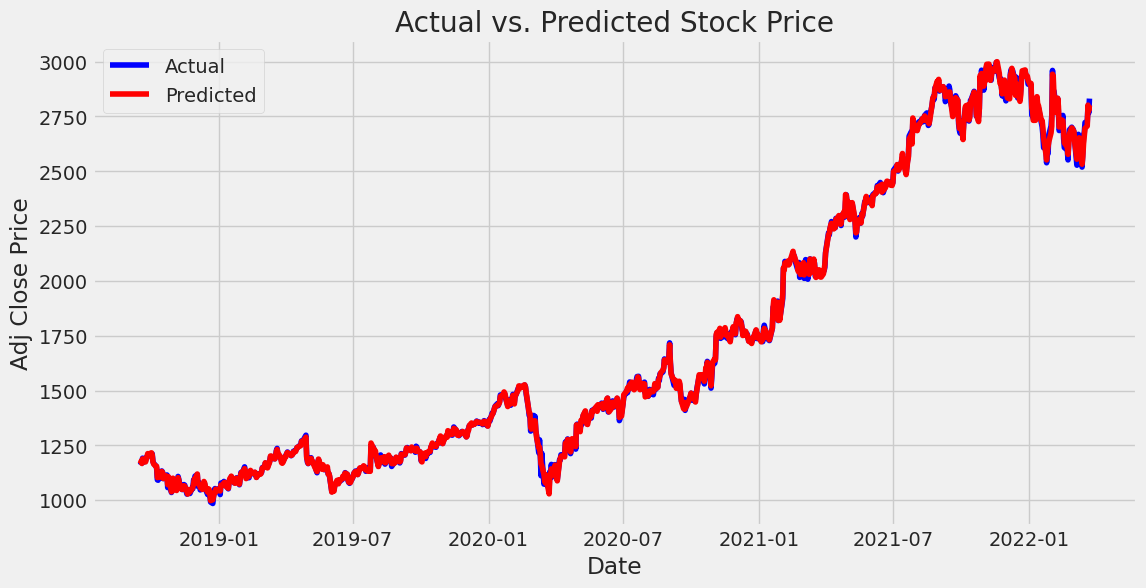

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index[split_index:], y_test, label='Actual', color='blue')
plt.plot(df.index[split_index:], y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

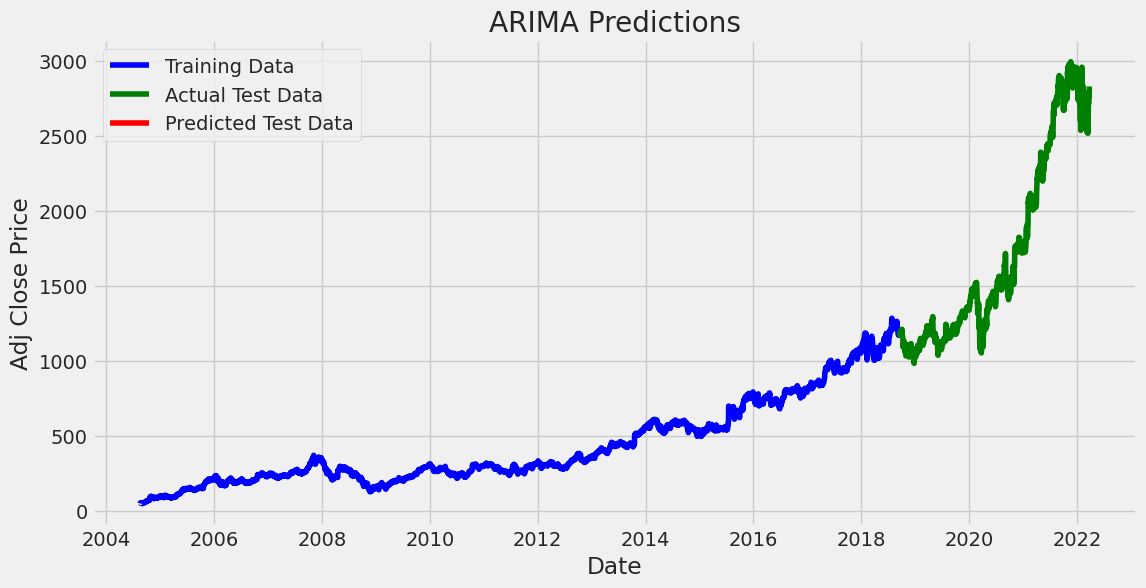

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
split_ratio = 0.8
split_index = int(split_ratio * len(df))
df_train, df_test = df[:split_index], df[split_index:]
model = ARIMA(df_train['Adj Close'], order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(df_test))
predicted_df = pd.DataFrame(predictions, index=df_test.index, columns=['Predicted'])
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['Adj Close'], label='Training Data', color='blue')
plt.plot(df_test.index, df_test['Adj Close'], label='Actual Test Data', color='green')
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted Test Data', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('ARIMA Predictions')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 68.94
R-squared (R2) Score: 1.00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")

Training Score: 1.00
Testing Score: 1.00


In [ ]:
df1=pd.read_csv(data_dir,  na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
output_var = scaler.fit_transform(output_var)

In [ ]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[train_index], feature_transform[test_index]
    y_train, y_test = output_var[train_index], output_var[test_index]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4736      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4769 (18.63 KB)
Trainable params: 4769 (18.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)]
history = lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, shuffle=True,callbacks=callbacks)

Epoch 1/50
126/126 [==============================] - 2s 3ms/step - loss: 0.0160
Epoch 2/50
126/126 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 3/50
126/126 [==============================] - 0s 3ms/step - loss: 1.6625e-04
Epoch 4/50
126/126 [==============================] - 0s 3ms/step - loss: 6.7544e-05
Epoch 5/50
126/126 [==============================] - 0s 3ms/step - loss: 3.6878e-05
Epoch 6/50
126/126 [==============================] - 0s 2ms/step - loss: 2.6833e-05
Epoch 7/50
126/126 [==============================] - 0s 3ms/step - loss: 2.1183e-05
Epoch 8/50
126/126 [==============================] - 0s 3ms/step - loss: 1.7604e-05
Epoch 9/50
126/126 [==============================] - 0s 3ms/step - loss: 1.5227e-05
Epoch 10/50
126/126 [==============================] - 0s 3ms/step - loss: 1.3348e-05
Epoch 11/50
126/126 [==============================] - 0s 3ms/step - loss: 1.1953e-05
Epoch 12/50
126/126 [==============================] - 0s 3ms/step - lo

In [ ]:
y_pred = lstm.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [ ]:
print(lstm.evaluate(X_test,y_test))

13/13 [==============================] - 0s 3ms/step - loss: 5613589.0000
5613589.0


In [ ]:
print(lstm.evaluate(X_train, y_train))

126/126 [==============================] - 1s 4ms/step - loss: 5.0414e-06
5.041443273512414e-06


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

R-squared: 0.7640739593880368
MSE: 55364.52194982456
RMSE: 235.29666795308546
MAE: 191.91676778538945


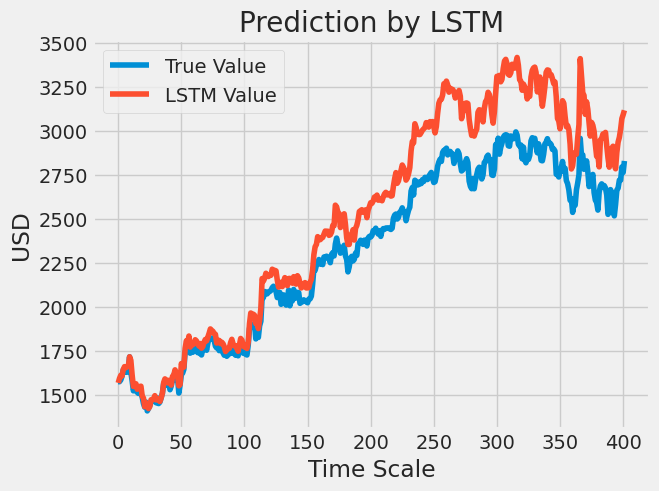

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.show()

In [ ]:
forecast_period = 30
forecast_data = feature_transform[-1].reshape(1, 1, len(features))
forecast_values = []
for _ in range(forecast_period):
    next_value = lstm.predict(forecast_data)
    forecast_values.append(next_value)
    forecast_data = np.append(forecast_data[:, 0, 1:], next_value).reshape(1, 1, len(features))
forecast_values = scaler.inverse_transform(np.array(forecast_values).reshape(-1, 1))

In [ ]:
try:
  plt.figure(figsize=(12, 6))
  last_date = df.index[-1]
  date_range = pd.date_range(start=last_date, periods=forecast_period, closed='right')
  plt.plot(df.index, df['Adj Close'], label='Historical Data', linewidth=2)
  plt.plot(date_range, forecast_values, label='Forecasted Data', linestyle='--', marker='o', markersize=5)
  plt.title("Price Forecast for the Next 30 Days")
  plt.xlabel('Date')
  plt.ylabel('USD')
  plt.legend()
  plt.show()
except:
  pass